In [1]:
import os
os.chdir("../..")

In [2]:
import time
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

notebook_start_time = time.time()
logging.info("Notebook execution started.")

2024-12-23 20:02:34,006 - INFO - Notebook execution started.


In [3]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [5]:
data_dir = "wildfire_dataset_scaled"
batch_size = 8
learning_rate = 0.0001
num_classes = 2

In [6]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



2024-12-23 20:02:40,611 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-23 20:02:40,611 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-23 20:02:40,623 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-23 20:02:40,627 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-23 20:02:40,630 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-23 20:02:40,630 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-23 20:02:40,631 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-23 20:02:40,632 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-23 20:02:40,634 - INFO - Class 'fire' has 730 samples.
2024-12-23 20:02:40,637 - INFO - Class 'nofire' has 1157 samples.
2024-12-23 20:02:40,637 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-23 20:02:42,881 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [7]:
print("\n[INFO] Starting Baseline Training for Model: ConvnextTiny\n")
print("[INFO] Initializing ConvnextTiny model...")
model = initialize_model(
    model_name="convnext_tiny",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: ConvnextTiny

[INFO] Initializing ConvnextTiny model...
[INFO] Model initialized successfully!


In [8]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [9]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/convnext_tiny.pt",
    early_stop_patience=12,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

notebook_end_time = time.time()
total_execution_time = notebook_end_time - notebook_start_time

logging.info(f"Notebook execution completed in {total_execution_time:.2f} seconds ({total_execution_time / 60:.2f} minutes).")

[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8377
Epoch [1]: Train Loss: 0.6580, Train Acc: 0.6502 | Val Loss: 0.6047, Val Acc: 0.7687, Val Recall: 0.9756, Val F1: 0.8377


[INFO] Best model saved with val_f1: 0.8597
Epoch [2]: Train Loss: 0.5849, Train Acc: 0.7843 | Val Loss: 0.5424, Val Acc: 0.8060, Val Recall: 0.9715, Val F1: 0.8597


[INFO] Best model saved with val_f1: 0.8722
Epoch [3]: Train Loss: 0.5445, Train Acc: 0.7886 | Val Loss: 0.5022, Val Acc: 0.8308, Val Recall: 0.9431, Val F1: 0.8722


[INFO] Best model saved with val_f1: 0.8864
Epoch [4]: Train Loss: 0.5013, Train Acc: 0.8267 | Val Loss: 0.4709, Val Acc: 0.8507, Val Recall: 0.9512, Val F1: 0.8864


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [5]: Train Loss: 0.4821, Train Acc: 0.8156 | Val Loss: 0.4512, Val Acc: 0.8433, Val Recall: 0.9228, Val F1: 0.8781


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [6]: Train Loss: 0.4753, Train Acc: 0.8103 | Val Loss: 0.4310, Val Acc: 0.8483, Val Recall: 0.9350, Val F1: 0.8829


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [7]: Train Loss: 0.4536, Train Acc: 0.8251 | Val Loss: 0.4156, Val Acc: 0.8483, Val Recall: 0.9390, Val F1: 0.8834


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [8]: Train Loss: 0.4250, Train Acc: 0.8347 | Val Loss: 0.4040, Val Acc: 0.8507, Val Recall: 0.9268, Val F1: 0.8837


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [9]: Train Loss: 0.4281, Train Acc: 0.8214 | Val Loss: 0.3935, Val Acc: 0.8507, Val Recall: 0.9268, Val F1: 0.8837


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [10]: Train Loss: 0.4084, Train Acc: 0.8362 | Val Loss: 0.3838, Val Acc: 0.8532, Val Recall: 0.9309, Val F1: 0.8859


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [11]: Train Loss: 0.3926, Train Acc: 0.8490 | Val Loss: 0.3747, Val Acc: 0.8532, Val Recall: 0.9309, Val F1: 0.8859


[INFO] Best model saved with val_f1: 0.8880
Epoch [12]: Train Loss: 0.3785, Train Acc: 0.8521 | Val Loss: 0.3670, Val Acc: 0.8557, Val Recall: 0.9350, Val F1: 0.8880


[INFO] Best model saved with val_f1: 0.8906
Epoch [13]: Train Loss: 0.3841, Train Acc: 0.8421 | Val Loss: 0.3617, Val Acc: 0.8607, Val Recall: 0.9268, Val F1: 0.8906


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [14]: Train Loss: 0.3673, Train Acc: 0.8521 | Val Loss: 0.3560, Val Acc: 0.8582, Val Recall: 0.9228, Val F1: 0.8885


[INFO] Best model saved with val_f1: 0.8919
Epoch [15]: Train Loss: 0.3650, Train Acc: 0.8511 | Val Loss: 0.3523, Val Acc: 0.8632, Val Recall: 0.9228, Val F1: 0.8919


[INFO] Best model saved with val_f1: 0.8928
Epoch [16]: Train Loss: 0.3656, Train Acc: 0.8437 | Val Loss: 0.3455, Val Acc: 0.8632, Val Recall: 0.9309, Val F1: 0.8928


[INFO] Best model saved with val_f1: 0.8992
Epoch [17]: Train Loss: 0.3560, Train Acc: 0.8590 | Val Loss: 0.3405, Val Acc: 0.8706, Val Recall: 0.9431, Val F1: 0.8992


[INFO] Best model saved with val_f1: 0.9002
Epoch [18]: Train Loss: 0.3584, Train Acc: 0.8543 | Val Loss: 0.3386, Val Acc: 0.8731, Val Recall: 0.9350, Val F1: 0.9002


[INFO] Best model saved with val_f1: 0.9045
Epoch [19]: Train Loss: 0.3668, Train Acc: 0.8495 | Val Loss: 0.3339, Val Acc: 0.8781, Val Recall: 0.9431, Val F1: 0.9045


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [20]: Train Loss: 0.3431, Train Acc: 0.8612 | Val Loss: 0.3296, Val Acc: 0.8756, Val Recall: 0.9472, Val F1: 0.9031


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [21]: Train Loss: 0.3392, Train Acc: 0.8686 | Val Loss: 0.3282, Val Acc: 0.8756, Val Recall: 0.9390, Val F1: 0.9023


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [22]: Train Loss: 0.3443, Train Acc: 0.8569 | Val Loss: 0.3260, Val Acc: 0.8781, Val Recall: 0.9350, Val F1: 0.9037


[INFO] Best model saved with val_f1: 0.9066
Epoch [23]: Train Loss: 0.3459, Train Acc: 0.8617 | Val Loss: 0.3212, Val Acc: 0.8806, Val Recall: 0.9472, Val F1: 0.9066


[INFO] Best model saved with val_f1: 0.9102
Epoch [24]: Train Loss: 0.3390, Train Acc: 0.8569 | Val Loss: 0.3191, Val Acc: 0.8856, Val Recall: 0.9472, Val F1: 0.9102


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [25]: Train Loss: 0.3417, Train Acc: 0.8442 | Val Loss: 0.3165, Val Acc: 0.8856, Val Recall: 0.9472, Val F1: 0.9102


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [26]: Train Loss: 0.3330, Train Acc: 0.8702 | Val Loss: 0.3153, Val Acc: 0.8831, Val Recall: 0.9390, Val F1: 0.9077


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [27]: Train Loss: 0.3161, Train Acc: 0.8744 | Val Loss: 0.3124, Val Acc: 0.8856, Val Recall: 0.9431, Val F1: 0.9098


[INFO] Best model saved with val_f1: 0.9127
Epoch [28]: Train Loss: 0.3399, Train Acc: 0.8596 | Val Loss: 0.3123, Val Acc: 0.8905, Val Recall: 0.9350, Val F1: 0.9127


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [29]: Train Loss: 0.3083, Train Acc: 0.8755 | Val Loss: 0.3077, Val Acc: 0.8831, Val Recall: 0.9431, Val F1: 0.9080


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [30]: Train Loss: 0.3124, Train Acc: 0.8733 | Val Loss: 0.3052, Val Acc: 0.8856, Val Recall: 0.9431, Val F1: 0.9098


[INFO] Best model saved with val_f1: 0.9152
Epoch [31]: Train Loss: 0.3053, Train Acc: 0.8781 | Val Loss: 0.3040, Val Acc: 0.8930, Val Recall: 0.9431, Val F1: 0.9152


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [32]: Train Loss: 0.3111, Train Acc: 0.8765 | Val Loss: 0.3033, Val Acc: 0.8930, Val Recall: 0.9350, Val F1: 0.9145


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [33]: Train Loss: 0.3056, Train Acc: 0.8792 | Val Loss: 0.3006, Val Acc: 0.8905, Val Recall: 0.9390, Val F1: 0.9130


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [34]: Train Loss: 0.3061, Train Acc: 0.8749 | Val Loss: 0.2998, Val Acc: 0.8881, Val Recall: 0.9350, Val F1: 0.9109


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [35]: Train Loss: 0.2895, Train Acc: 0.8781 | Val Loss: 0.2967, Val Acc: 0.8881, Val Recall: 0.9431, Val F1: 0.9116


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [36]: Train Loss: 0.3354, Train Acc: 0.8580 | Val Loss: 0.2975, Val Acc: 0.8930, Val Recall: 0.9309, Val F1: 0.9142


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [37]: Train Loss: 0.3064, Train Acc: 0.8744 | Val Loss: 0.2937, Val Acc: 0.8881, Val Recall: 0.9390, Val F1: 0.9112


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [38]: Train Loss: 0.3261, Train Acc: 0.8606 | Val Loss: 0.2948, Val Acc: 0.8905, Val Recall: 0.9309, Val F1: 0.9124


[INFO] No improvement in val_f1. Patience: 8/12
Epoch [39]: Train Loss: 0.2928, Train Acc: 0.8887 | Val Loss: 0.2913, Val Acc: 0.8881, Val Recall: 0.9350, Val F1: 0.9109


[INFO] No improvement in val_f1. Patience: 9/12
Epoch [40]: Train Loss: 0.2955, Train Acc: 0.8786 | Val Loss: 0.2907, Val Acc: 0.8930, Val Recall: 0.9350, Val F1: 0.9145


[INFO] No improvement in val_f1. Patience: 10/12
Epoch [41]: Train Loss: 0.3007, Train Acc: 0.8802 | Val Loss: 0.2900, Val Acc: 0.8905, Val Recall: 0.9309, Val F1: 0.9124


[INFO] No improvement in val_f1. Patience: 11/12
Epoch [42]: Train Loss: 0.3020, Train Acc: 0.8696 | Val Loss: 0.2887, Val Acc: 0.8905, Val Recall: 0.9309, Val F1: 0.9124


2024-12-23 20:09:37,250 - INFO - Notebook execution completed in 423.24 seconds (7.05 minutes).


[INFO] No improvement in val_f1. Patience: 12/12
Epoch [43]: Train Loss: 0.2910, Train Acc: 0.8839 | Val Loss: 0.2884, Val Acc: 0.8930, Val Recall: 0.9268, Val F1: 0.9138
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 43 epochs. Best val_f1: 0.9152

[INFO] Training completed successfully!


In [10]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="convnext_tiny",
    save_base_path="outputs/plots/baseline",
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline\convnext_tiny\convnext_tiny_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.8711656441717791, 'recall': 0.8930817610062893, 'f1-score': 0.8819875776397516, 'support': 159.0}, 'Fire': {'precision': 0.9311740890688259, 'recall': 0.9163346613545816, 'f1-score': 0.9236947791164659, 'support': 251.0}, 'accuracy': 0.9073170731707317, 'macro avg': {'precision': 0.9011698666203025, 'recall': 0.9047082111804354, 'f1-score': 0.9028411783781087, 'support': 410.0}, 'weighted avg': {'precision': 0.9079025214136298, 'recall': 0.9073170731707317, 'f1-score': 0.9075205229340328, 'support': 410.0}}, 'confusion_matrix': [[142, 17], [21, 230]], 'roc_auc': 0.9597835074795159, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[INFO] Training plot saved to outputs/plots/baseline/convnext_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/convnext_baseline_confusion_matrix.png
[INFO] All results saved successfully!


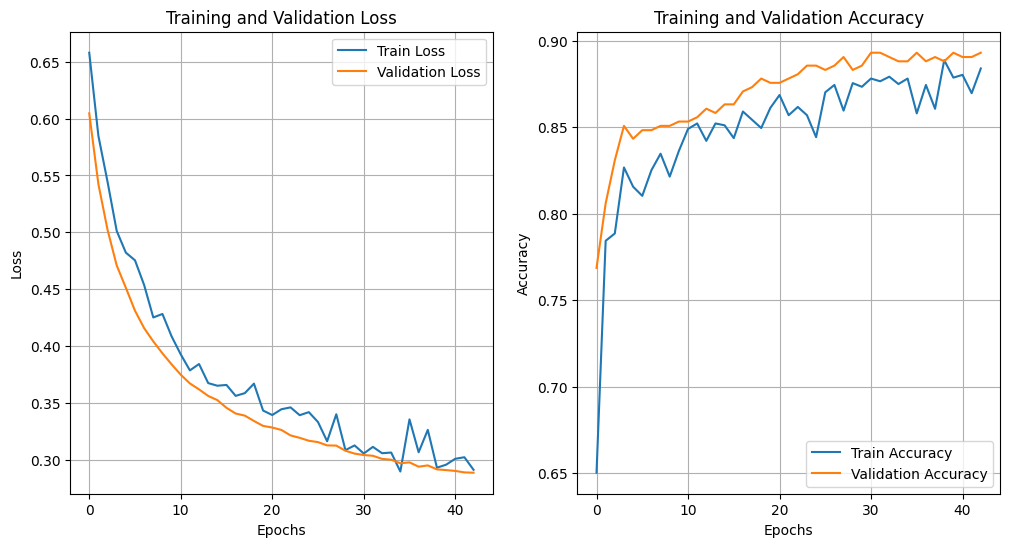

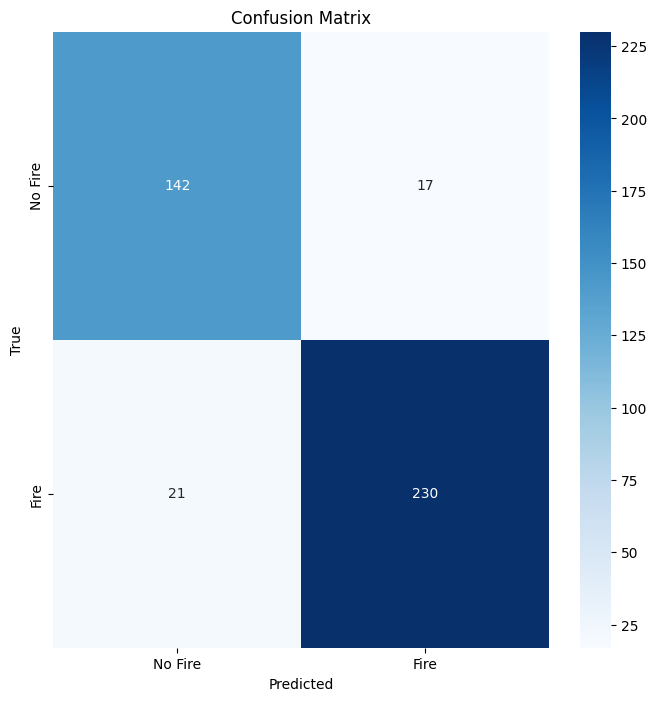

In [11]:
# Training and Validation Curves
plot_training(history, f"outputs/plots/baseline/convnext_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/convnext_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/convnext_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/convnext_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")